In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as tm
import pickle
import sys

In [3]:
def merck_euler(population,dt,b,q,m,n1,n2,a):

    x, y1, y2 = population
    
    dy      = np.empty(3)

    dy[0] = x + dt*(x*(b*q**(m+n1+n2)-a))
    dy[1] = y1 + dt*(x*b*q**(m+n2)*(1-q**n1)+y1*(b*q**(m+n2)-a))
    dy[2] = y2 + dt*(x*b*q**(m+n1)*(1-q**n2)+y2*(b*q**(m+n1)-a))
    
    return(dy)

In [4]:
def simulation(init,b,a0,a1,q0,q1,m,n1,n2,tim,ttr):
    
    dt = 1e-3
    initial = [init[0],init[1],init[2]]
    population = initial.copy()
    pop_evol = []
    
    current_q = q0
    current_a = a0

    for ngen in np.arange(150/dt):
        if ngen % 10 == 0:
            pop_evol.append(population)
        
        population = merck_euler(population,dt,b,current_q,m,n1,n2,current_a)
        
        # immune system kicks in
        if ngen > tim/dt:
            current_a = a1
            
        # Merck treatment starts
        if ngen > ttr/dt:
            current_q = q1
            
    pop_evol = np.array(pop_evol)
    return(pop_evol)

In [5]:
b = 7.61
init = [1,0,0]
a0 = 3
a1 = 7.76
q0 = 1-1e-6
q1 = 1-3e-6
m = 20000
tim = 5
ttr = 5
n1 = 50
n2 = 50
qrange = 1-np.logspace(-6,-3)

In [6]:
param_pairs = [(10000,7.76),(20000,7.76),(10000,8.07),(20000,8.07)]

In [7]:
all_cumul_Y = []

for pair in param_pairs:
    print(pair)
    mval, a1val = pair
    cumul_Y = []
    
    for q1val in qrange:
        Y = simulation(init,b,a0,a1val,q0,q1val,mval,n1,n2,tim,ttr)
        cumul_Y.append(np.sum(Y, axis = 0))
        
    all_cumul_Y.append(np.array(cumul_Y))
all_cumul_Y = np.array(all_cumul_Y)*1e-2

(10000, 7.76)
(20000, 7.76)
(10000, 8.07)
(20000, 8.07)


In [8]:
pos_plot = {(0,0):0,(0,1):1,(1,0):2,(1,1):3}

In [9]:
def calculate_ERF(arrays, r1, r2):
    return((arrays[0]*r1+arrays[1]*r2)/(arrays[0][0]*r1+arrays[1][0]*r2)) 

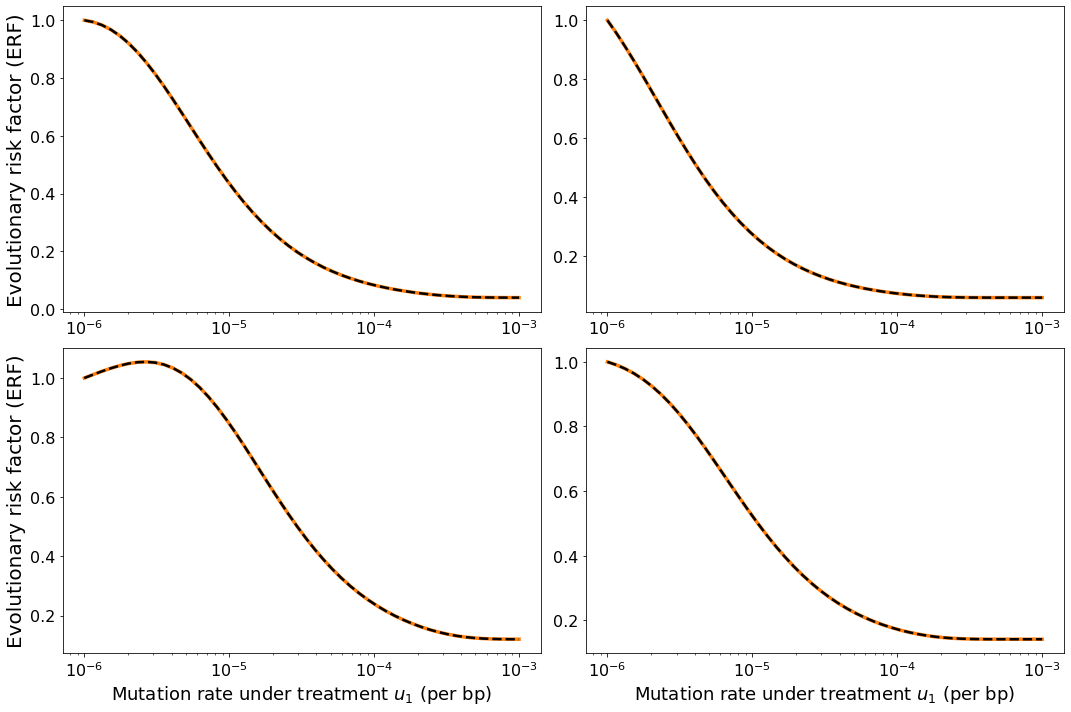

In [17]:
fig, ax = plt.subplots(2,2,figsize = (15,10))

for i in range(2):
    for j in range(2):
        ax[i,j].set_xscale('log')
        ax[i,j].tick_params(labelsize = 16)
        ax[i,j].yaxis.offsetText.set_fontsize(12)
        ax[i,j].plot(1-qrange, calculate_ERF(all_cumul_Y[pos_plot[(i,j)]][:,1:].T,1,1), c = 'C1', linewidth = 3.5)
        ax[i,j].plot(1-qrange, calculate_ERF(all_cumul_Y[pos_plot[(i,j)]][:,1:].T,1,500), c = 'k', linestyle = 'dashed', linewidth  = 2.5)
    ax[1,i].set_xlabel('Mutation rate under treatment $u_1$ (per bp)', fontsize = 18)
    ax[i,0].set_ylabel('Evolutionary risk factor (ERF)', fontsize = 20)

plt.tight_layout()
plt.savefig('ERF_weight_treatmentpeak_JULY19.jpg', dpi = 400, bbox_inches = 'tight')

In [18]:
all_cumul_Y_infection = []

for pair in param_pairs:
    print(pair)
    mval, a1val = pair
    cumul_Y = []
    
    for q1val in qrange:
        Y = simulation(init,b,a0,a1val,q0,q1val,mval,n1,n2,tim,0)
        cumul_Y.append(np.sum(Y, axis = 0))
        
    all_cumul_Y_infection.append(np.array(cumul_Y))
all_cumul_Y_infection = np.array(all_cumul_Y_infection)*1e-2

(10000, 7.76)
(20000, 7.76)
(10000, 8.07)
(20000, 8.07)


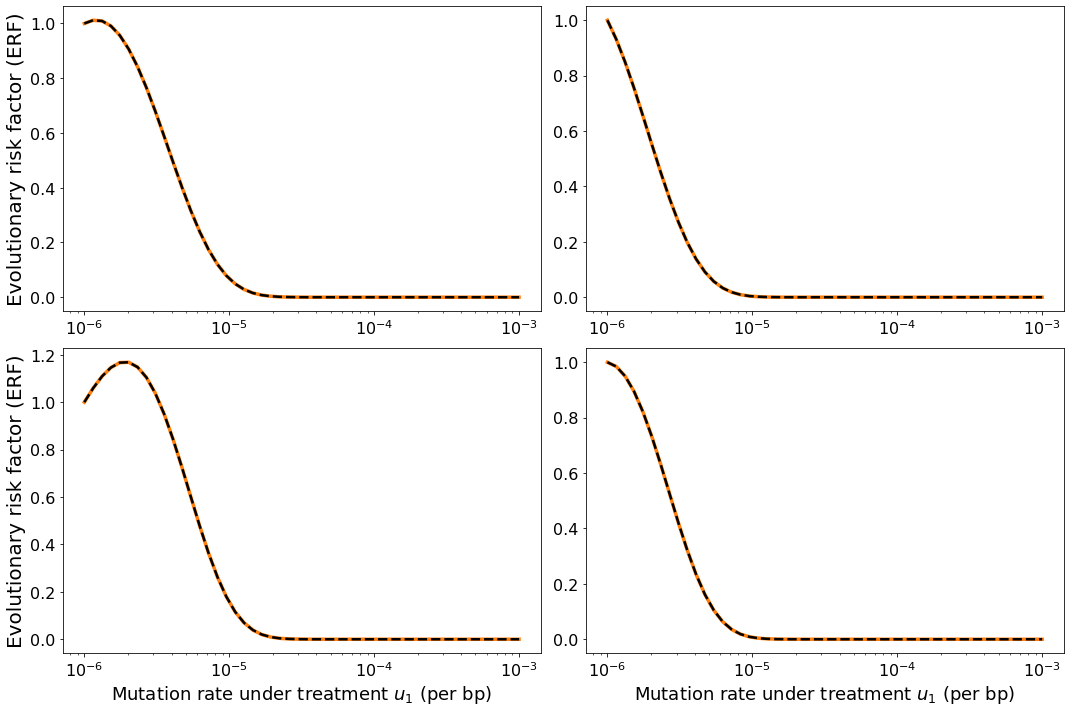

In [20]:
fig, ax = plt.subplots(2,2,figsize = (15,10))

for i in range(2):
    for j in range(2):
        ax[i,j].set_xscale('log')
        ax[i,j].tick_params(labelsize = 16)
        ax[i,j].yaxis.offsetText.set_fontsize(12)
        ax[i,j].plot(1-qrange, calculate_ERF(all_cumul_Y_infection[pos_plot[(i,j)]][:,1:].T,1,1), c = 'C1', linewidth = 3.5)
        ax[i,j].plot(1-qrange, calculate_ERF(all_cumul_Y_infection[pos_plot[(i,j)]][:,1:].T,1,500), c = 'k', linestyle = 'dashed', linewidth  = 2.5)
    ax[1,i].set_xlabel('Mutation rate under treatment $u_1$ (per bp)', fontsize = 18)
    ax[i,0].set_ylabel('Evolutionary risk factor (ERF)', fontsize = 20)

plt.tight_layout()
plt.savefig('ERF_weight_treatmentinfection_JULY19.jpg', dpi = 400, bbox_inches = 'tight')

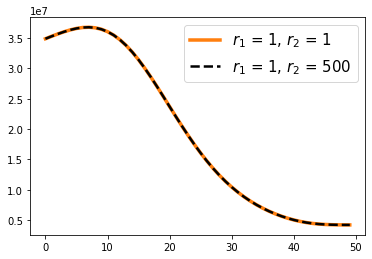

In [35]:
plt.plot(all_cumul_Y[2][:,2], c = 'C1', linewidth = 3.5)
plt.plot(all_cumul_Y[2][:,2], c = 'k', linestyle = 'dashed', linewidth  = 2.5)
plt.legend(['$r_1$ = 1, $r_2$ = 1', '$r_1$ = 1, $r_2$ = 500'], fontsize = 15)
plt.savefig('ERF_u1_weighted_legend_JULY6.jpg', dpi = 600, bbox_inches = 'tight')